<a href="https://colab.research.google.com/github/jamilly-b/curso-machine-learning/blob/main/Aulas/Aula13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0,'female': 1})
titanic.dropna(subset=feature_names, inplace = True)

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 123)






In [7]:
print('Tamanho de X_train:', X_train.shape)
print('Tamanho de X_test:', X_test.shape)
print('Tamanho de y_train:', y_train.shape)
print('Tamanho de y_test:', y_test.shape)

Tamanho de X_train: (535, 4)
Tamanho de X_test: (179, 4)
Tamanho de y_train: (535,)
Tamanho de y_test: (179,)


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4,activation = 'relu', input_shape = X_train[0].shape))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [11]:
batch_size = 32
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 16.4213 - accuracy: 0.4542 - val_loss: 16.5942 - val_accuracy: 0.3966
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 16.2610 - accuracy: 0.4449 - val_loss: 15.3785 - val_accuracy: 0.3966
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 15.4884 - accuracy: 0.4019 - val_loss: 14.1883 - val_accuracy: 0.3966
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 13.4201 - accuracy: 0.4542 - val_loss: 13.0229 - val_accuracy: 0.3966
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 12.4112 - accuracy: 0.4467 - val_loss: 11.9263 - val_accuracy: 0.3911
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 12.9476 - accuracy: 0.4168 - val_loss: 10.7765 - val_accuracy: 0.3911
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 11.0060 - accuracy: 0.4636 - val_loss: 9.5871 - val_accuracy: 0.3855

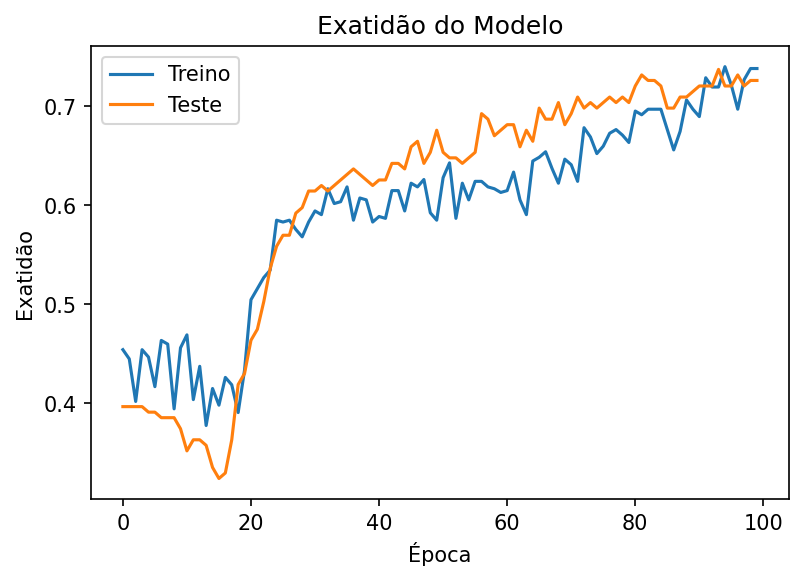

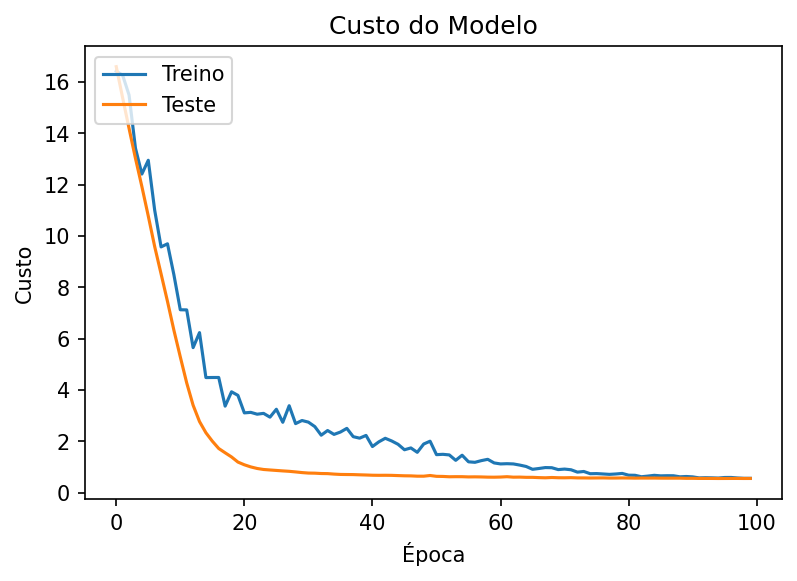

In [16]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

#Plot acuracia de treino e validação

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

In [17]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.7263


[0.5520188212394714, 0.7262569665908813]

In [19]:
(model.predict(X_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    